<a href="https://colab.research.google.com/github/jafetimbre/mib-fiesta/blob/master/Copy_of_imbre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Curatarea seturilor de date



### Incarcarea seturilor de date
Datasetul principal ales contine preturile caselor vandute in intervalul Mai-2014 si Mai- 2015 in orasul Seattle.
Atributele:
<ul>
<li><strong>price</strong>-pretul cu care a fost vanduta locuinta</li>
<li><strong>bedrooms</strong>- numarul dormitoarelor</li>
<li><strong>bathrooms</strong>-numarul de bai/dormitoare</li>
<li><strong>sqft_living</strong>-suprafata utila locuibila</li>
<li><strong>sqft_lot</strong>intreaga suprafata</li>
<li><strong>floors-</strong>numarul etajelor</li>
<li><strong>waterfront-</strong>locuinta pe malul unei ape</li>
<li><strong>condition-</strong>gradul de confort per total</li>
<li><strong>grade-</strong>nota locuintel dupa standardul Seattle</li>
<li><strong>yr_built-</strong>Anul construirii</li>
<li><strong>yr_renovated-</strong>Anul renovarii</li>
<li><strong>zipcode-</strong>Codul postal</li>
<li><strong>lat-</strong>Latitudinea</li>
<li><strong>long-</strong>Longitudinea</li>
</ul>

Pastrarea campurilor relevante si inlaturarea celor irelevante.

In [3]:
housing_columns = [ 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated' ,'zipcode', 'lat', 'long' ]
housing_data = pd.read_csv('https://raw.githubusercontent.com/jafetimbre/mib-fiesta/master/data/housing.csv', usecols=housing_columns)
housing_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900,3,1.00,1180,5650,1.0,0,3,7,0,1955,0,98178,47.5112,-122.257
1,538000,3,2.25,2570,7242,2.0,0,3,7,400,1951,1991,98125,47.7210,-122.319
2,180000,2,1.00,770,10000,1.0,0,3,6,0,1933,0,98028,47.7379,-122.233
3,604000,4,3.00,1960,5000,1.0,0,5,7,910,1965,0,98136,47.5208,-122.393
4,510000,3,2.00,1680,8080,1.0,0,3,8,0,1987,0,98074,47.6168,-122.045


Al doilea set de date ales este un set ajutator, care contine anumite cladiri relevante din imprejurimile caselor primului dataset.
<ul>
<li><strong>BuildingTypeName-</strong>Tipul Cladirii</li>
<li><strong>PropertyTypeEPA-</strong>Propietatea (spital,restaurant,gradinita)</li>
<li><strong>City-</strong>Orasul</li>
<li><strong>Zip-</strong>Cod postal</li>
<li><strong>Neighborhood-</strong>Cartierul</li>
<li><strong>Longitude-</strong>Longitudinea</li>
<li><strong>Latitude-</strong>Latitudinea</li></ul>

In [4]:
property_columns = [ 'BuildingTypeName', 'PropertyTypeEPA', 'City', 'Zip', 'Neighborhood', 'Latitude', 'Longitude' ]
property_data = pd.read_csv('https://raw.githubusercontent.com/jafetimbre/mib-fiesta/master/data/property_types.csv', usecols=property_columns)
property_data.head()

,BuildingTypeName,PropertyTypeEPA,City,Zip,Neighborhood,Latitude,Longitude
0,NonResidential,Hotel,SEATTLE,98101,DOWNTOWN,47.612190,-122.337997
1,NonResidential,Hotel,SEATTLE,98101,DOWNTOWN,47.613106,-122.333358
2,NonResidential,Hotel,SEATTLE,98101,DOWNTOWN,47.613349,-122.337699
3,NonResidential,Hotel,SEATTLE,98101,DOWNTOWN,47.614216,-122.336609
4,NonResidential,Hotel,SEATTLE,98121,DOWNTOWN,47.613754,-122.340924


## General
Construirea unei liste de coduri postale comune

In [5]:
zip_property_data = property_data.Zip.unique()
zip_housing_data = housing_data.zipcode.unique()
zip_comon = list(set(zip_property_data).intersection(zip_housing_data))
print(zip_comon)

[98177, 98178, 98199, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98155]


## Procesarea primului set

In [6]:
property_data.head()

,BuildingTypeName,PropertyTypeEPA,City,Zip,Neighborhood,Latitude,Longitude
0,NonResidential,Hotel,SEATTLE,98101,DOWNTOWN,47.612190,-122.337997
1,NonResidential,Hotel,SEATTLE,98101,DOWNTOWN,47.613106,-122.333358
2,NonResidential,Hotel,SEATTLE,98101,DOWNTOWN,47.613349,-122.337699
3,NonResidential,Hotel,SEATTLE,98101,DOWNTOWN,47.614216,-122.336609
4,NonResidential,Hotel,SEATTLE,98121,DOWNTOWN,47.613754,-122.340924


Eliminarearea randurilor nerelevante

In [7]:
property_data = property_data[property_data.BuildingTypeName.map(lambda e: e in ['NonResidential', 'Nonresidential COS', 'SPS-District K-12', 'Campus'])]
property_data = property_data[property_data.City.map(lambda e: e == 'SEATTLE')]
property_data = property_data[property_data.Zip.map(lambda e: e in zip_comon)]
property_data = property_data[property_data.PropertyTypeEPA.map(lambda e: e != 'Hotel')]

property_data = property_data.drop(['BuildingTypeName', 'City'], axis=1)
property_data = property_data.rename(columns={'PropertyTypeEPA': 'property_type', 'Zip': 'zip', 'Neighborhood':'neighborhood', 'Latitude': 'latitude', 'Longitude':'longitude'})

property_data.dropna(inplace=True)
property_data.reset_index(drop=True)

property_data.head()

property_data.to_csv('property_data_cleaned.csv', index = False, header=True)

## Procesarea setului 2

In [8]:
housing_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900,3,1.00,1180,5650,1.0,0,3,7,0,1955,0,98178,47.5112,-122.257
1,538000,3,2.25,2570,7242,2.0,0,3,7,400,1951,1991,98125,47.7210,-122.319
2,180000,2,1.00,770,10000,1.0,0,3,6,0,1933,0,98028,47.7379,-122.233
3,604000,4,3.00,1960,5000,1.0,0,5,7,910,1965,0,98136,47.5208,-122.393
4,510000,3,2.00,1680,8080,1.0,0,3,8,0,1987,0,98074,47.6168,-122.045


In [9]:
housing_data.sqft_living = housing_data.sqft_living.apply(lambda e: round(e * 0.092))
housing_data.sqft_lot = housing_data.sqft_lot.apply(lambda e: round(e * 0.092))
housing_data.sqft_basement = housing_data.sqft_basement.apply(lambda e: round(e * 0.092))

housing_data = housing_data[housing_data.zipcode.map(lambda e: e in zip_comon)]

housing_data = housing_data.rename(columns={'sqft_living': 'm2_living', 'sqft_lot':'m2_lot', 'sqft_basement':'m2_basement', 'zipcode':'zip'})

housing_data.dropna(inplace=True)
housing_data.reset_index(drop=True)

housing_data.head()

housing_data.to_csv('housing_data_cleaned.csv', index = False, header=True)

In [10]:
housing_data.head()

,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,condition,grade,m2_basement,yr_built,yr_renovated,zip,lat,long
0,221900,3,1.00,109,520,1.0,0,3,7,0,1955,0,98178,47.5112,-122.257
1,538000,3,2.25,236,666,2.0,0,3,7,37,1951,1991,98125,47.7210,-122.319
3,604000,4,3.00,180,460,1.0,0,5,7,84,1965,0,98136,47.5208,-122.393
8,229500,3,1.00,164,687,1.0,0,3,7,67,1960,0,98146,47.5123,-122.337
11,468000,2,1.00,107,552,1.0,0,4,7,28,1942,0,98115,47.6900,-122.292


In [11]:
housing_data[['price','m2_living',]].describe()

,price,m2_living
count,7.981000e+03,7981.000000
mean,5.612638e+05,165.649292
std,3.450309e+05,73.781897
min,8.200000e+04,34.000000
25%,3.620000e+05,114.000000
50%,4.780000e+05,151.000000
75%,6.500000e+05,202.000000
max,7.700000e+06,1109.000000


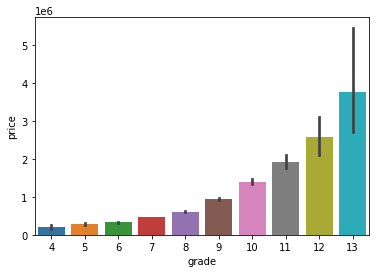

In [27]:
#plt.bar(housing_data['grade'],housing_data['price'])
#plt.show()
sns.barplot(x='grade',y='price',data=housing_data)


In [16]:
#print( housing_data['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0


In [17]:
housing_data.count()

price           7981
bedrooms        7981
bathrooms       7981
m2_living       7981
m2_lot          7981
floors          7981
waterfront      7981
condition       7981
grade           7981
m2_basement     7981
yr_built        7981
yr_renovated    7981
zip             7981
lat             7981
long            7981
dtype: int64